In [2]:
import fastf1
import fastf1.plotting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl.styles import PatternFill
from openpyxl import Workbook
from openpyxl import load_workbook
from datetime import datetime, timedelta



# enabling misc_mpl_mods will turn on minor grid lines that clutters the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [3]:
session = fastf1.get_session(2023,10,'FP3')
session.load()


api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for British Grand Prix - Practice 3 [v2.3.1]
api            INFO 	Fetching driver list...
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, resu

### Pre defined

In [4]:
compound_color = {'HARD': 'F0F0EC', 
                  'INTERMEDIATE': '43B02A', 
                  'MEDIUM': 'FFD12E', 
                  'SOFT': 'DA291C', 
                  'TEST-UNKNOWN': '434649', 
                  'UNKNOWN': '00FFFF', 
                  'WET': '0067AD'}
compound = ['All Compounds','SOFT','MEDIUM','HARD']

In [5]:
def max_lap(laps):
    grouped = laps.groupby("Driver")
    count_values = grouped['LapNumber'].count()
    return count_values.max()

### Code Start

In [6]:
laps = session.laps.pick_quicklaps()
max_lap = int(max_lap(laps)+1)
max_lap_time = int(session.laps["LapTime"].dt.total_seconds().max())
drivers = session.drivers
comp = 0

In [7]:
laps['LapTimeMinute'] = pd.to_timedelta(laps['LapTime'])
laps['LapTimeMinute'] = laps['LapTimeMinute'].apply(lambda x: f"{x.seconds//60:02d}:{x.seconds%60:02d}.{x.microseconds//1000:03d}")
laps['LapTimeMinute']

C:\Users\GTR\AppData\Local\Temp\ipykernel_13092\2835627394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTimeMinute'] = pd.to_timedelta(laps['LapTime'])
C:\Users\GTR\AppData\Local\Temp\ipykernel_13092\2835627394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTimeMinute'] = laps['LapTimeMinute'].apply(lambda x: f"{x.seconds//60:02d}:{x.seconds%60:02d}.{x.microseconds//1000:03d}")


1      01:28.836
4      01:28.266
9      01:33.494
20     01:29.041
22     01:28.766
25     01:28.284
37     01:29.044
40     01:27.964
43     01:28.036
58     01:28.966
61     01:27.948
64     01:29.693
74     01:30.245
76     01:29.663
78     01:29.233
111    01:29.815
113    01:29.120
116    01:27.592
125    01:30.431
128    01:29.695
130    01:29.114
133    01:28.337
147    01:30.618
149    01:29.561
151    01:29.682
154    01:28.504
166    01:29.688
168    01:29.207
171    01:32.980
180    01:29.475
182    01:28.774
185    01:28.620
194    01:29.000
198    01:28.068
200    01:27.419
220    01:29.244
222    01:28.956
226    01:27.784
235    01:29.786
238    01:28.904
241    01:33.286
254    01:30.279
256    01:29.510
258    01:29.537
261    01:27.893
273    01:29.995
275    01:29.071
278    01:28.563
291    01:30.102
293    01:29.838
295    01:29.418
298    01:28.151
307    01:30.301
309    01:29.848
311    01:29.586
322    01:30.863
324    01:29.437
326    01:31.524
328    01:29.6

In [8]:
if(comp == 0):
    laps_session = laps[["DriverNumber","Driver","LapNumber","LapStartDate","Compound","LapTime"]]
    laps_session["LapTimeS"] = laps_session["LapTime"].dt.total_seconds()
    laps_session["LapStartDateM"] = laps_session["LapStartDate"].dt.minute
else:
    laps_session = laps.loc[(laps["Compound"] == compound[comp]),["DriverNumber","Driver","LapNumber","LapStartDate","Compound","LapTime"]]
    laps_session["LapTimeS"] = laps_session["LapTime"].dt.total_seconds()
    laps_session["LapStartDateM"] = laps_session["LapStartDate"].dt.minute

C:\Users\GTR\AppData\Local\Temp\ipykernel_13092\1871080469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_session["LapTimeS"] = laps_session["LapTime"].dt.total_seconds()
C:\Users\GTR\AppData\Local\Temp\ipykernel_13092\1871080469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_session["LapStartDateM"] = laps_session["LapStartDate"].dt.minute


In [9]:
max_lap_time = int(laps_session["LapTimeS"].max()+3)
min_lap_time = int(laps_session["LapTimeS"].min()-1)

### Graph Pace Practice

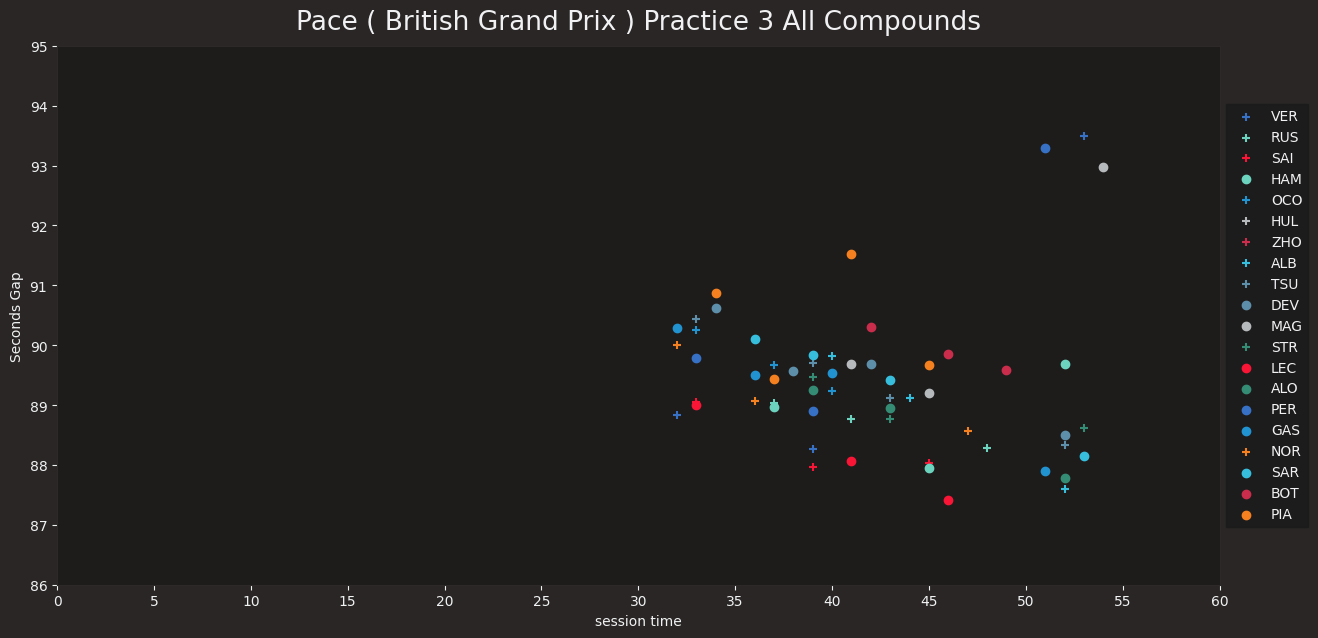

In [10]:
plt.figure(figsize=(15, 7))
color_picked = []
for i in drivers:
    x = laps_session.loc[laps_session["DriverNumber"] == i,"LapStartDateM"]
    y = laps_session.loc[laps_session["DriverNumber"] == i,"LapTimeS"]

    driver_name = session.get_driver(i)["Abbreviation"]
    team_color = session.get_driver(i)["TeamColor"]
    
    if team_color in color_picked:
        plt.scatter(x, y, color="#"+team_color, marker='o', label=driver_name)
    else:    
        plt.scatter(x, y, color="#"+team_color, marker='+', label=driver_name)
        color_picked.append(team_color)

# Customize the plot
plt.title('Pace ( '+session.event["EventName"]+' ) '+session.event["Session3"] +" "+compound[comp])
plt.xlabel('session time')
plt.ylabel('Seconds Gap')
plt.xticks(range(0,65, 5))
plt.yticks(range(min_lap_time, max_lap_time, 1))

# Add legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


### Table pace 

In [11]:
data_time = pd.DataFrame()
data_time ["lapNumber"] = [i for i in range(1, max_lap+1)]
data_comp = pd.DataFrame()
data_comp ["lapNumber"] = [i for i in range(1, max_lap+1)]

In [12]:
for i in drivers:
    data_time [session.get_driver(i)['Abbreviation']] = laps.loc[laps["DriverNumber"]==i,["LapTimeMinute"]].reset_index(drop=True)
    data_comp [session.get_driver(i)['Abbreviation']] = laps.loc[laps["DriverNumber"]==i,["Compound"]].reset_index(drop=True)

In [13]:
df = pd.DataFrame(data_time)

df.to_excel('Session_lap_time.xlsx', index=False)
# Charger le fichier Excel existant
fichier_excel = 'Session_lap_time.xlsx'
classeur = load_workbook(fichier_excel)

# Sélectionner la feuille active
feuille = classeur.active

for j in range(1,data_time.shape[1]):
    for i in range(0,data_time.shape[0]):
        compound = data_comp.iloc[i,j]
        if(compound == "HARD"):
            couleur = compound_color["HARD"]
        elif(compound == "MEDIUM"):
            couleur = compound_color["MEDIUM"]
        elif(compound == "SOFT"):
            couleur = compound_color["SOFT"]
        else:
            couleur = 'FFFFFF'
        cellule = feuille.cell(row=i+2, column=j+1)
        cellule.fill = PatternFill(start_color=couleur, end_color=couleur, fill_type='solid')

# Enregistrer les modifications dans le fichier Excel
classeur.save(fichier_excel)

### Top Speed in session

In [14]:
driver_list = []
DriverAB_list = []
top_speed_list = []
color_list = []
df_top_speed = pd.DataFrame()
for i in drivers:
    if laps.pick_driver(i).empty:
        print("The DataFrame is empty")
    else:
        max_speed = laps.pick_driver(i).pick_fastest().get_car_data()
        Top_Speed = max_speed.loc[max_speed['Speed'].idxmax(),"Speed"]
        Driver = session.get_driver(i)[["DriverNumber"]].values[0]
        DriverAB = session.get_driver(i)[["Abbreviation"]].values[0]
        TeamColor = session.get_driver(i)[["TeamColor"]].values[0]
        driver_list.append(Driver)
        DriverAB_list.append(DriverAB)
        top_speed_list.append(Top_Speed)
        color_list.append('#'+TeamColor)
df_top_speed["DriverNumber"] = driver_list
df_top_speed["Driver"] = DriverAB_list
df_top_speed["TopSpeed"] = top_speed_list
df_top_speed["Color"] = color_list
df_top_speed = df_top_speed.sort_values(by='TopSpeed', ascending=False)


c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` 

The DataFrame is empty
The DataFrame is empty


c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` 

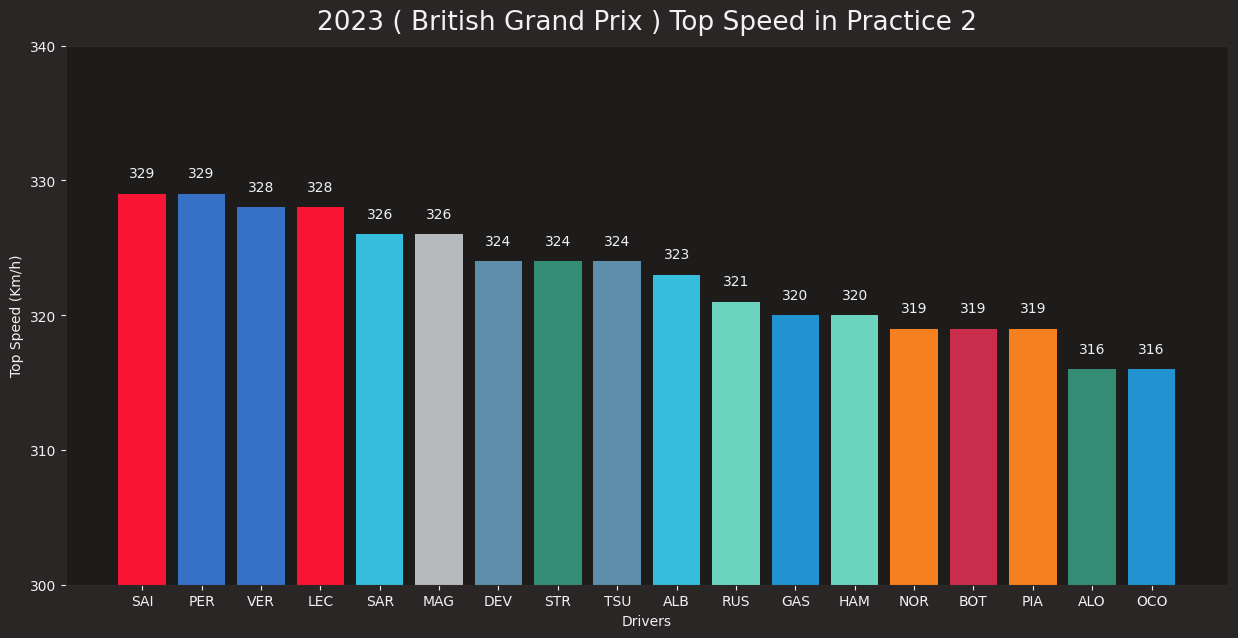

In [15]:
plt.figure(figsize=(15, 7))
x = df_top_speed["Driver"].reset_index(drop=True)
y = df_top_speed["TopSpeed"].reset_index(drop=True)

# Create the bar plot
plt.bar(x, y,color = df_top_speed["Color"])

# Add labels and title
plt.xlabel('Drivers')
plt.ylabel('Top Speed (Km/h)')
plt.title('2023 ( '+session.event["EventName"]+' ) Top Speed in '+session.event["Session2"])
plt.yticks(range(300, 400, 10))
plt.ylim(300, 340)
# Add text annotations on top of bars
for i in range(len(x)):
    plt.text(i, y.loc[i]+1, str(y.loc[i]), ha='center', va='bottom')

# Display the plot
plt.show()

### averege Speed in fastest lap

In [16]:
driver_list = []
DriverAB_list = []
top_speed_list = []
color_list = []
df_top_speed = pd.DataFrame()
for i in drivers:
    if laps.pick_driver(i).empty:
        print("The DataFrame is empty")
    else:
        max_speed = laps.pick_driver(i).pick_fastest().get_car_data()
        Top_Speed = round(max_speed["Speed"].mean())
        Driver = session.get_driver(i)[["DriverNumber"]].values[0]
        DriverAB = session.get_driver(i)[["Abbreviation"]].values[0]
        TeamColor = session.get_driver(i)[["TeamColor"]].values[0]
        driver_list.append(Driver)
        DriverAB_list.append(DriverAB)
        top_speed_list.append(Top_Speed)
        color_list.append('#'+TeamColor)
df_top_speed["DriverNumber"] = driver_list
df_top_speed["Driver"] = DriverAB_list
df_top_speed["TopSpeed"] = top_speed_list
df_top_speed["Color"] = color_list
df_top_speed = df_top_speed.sort_values(by='TopSpeed', ascending=False)


c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` 

The DataFrame is empty
The DataFrame is empty


c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` 

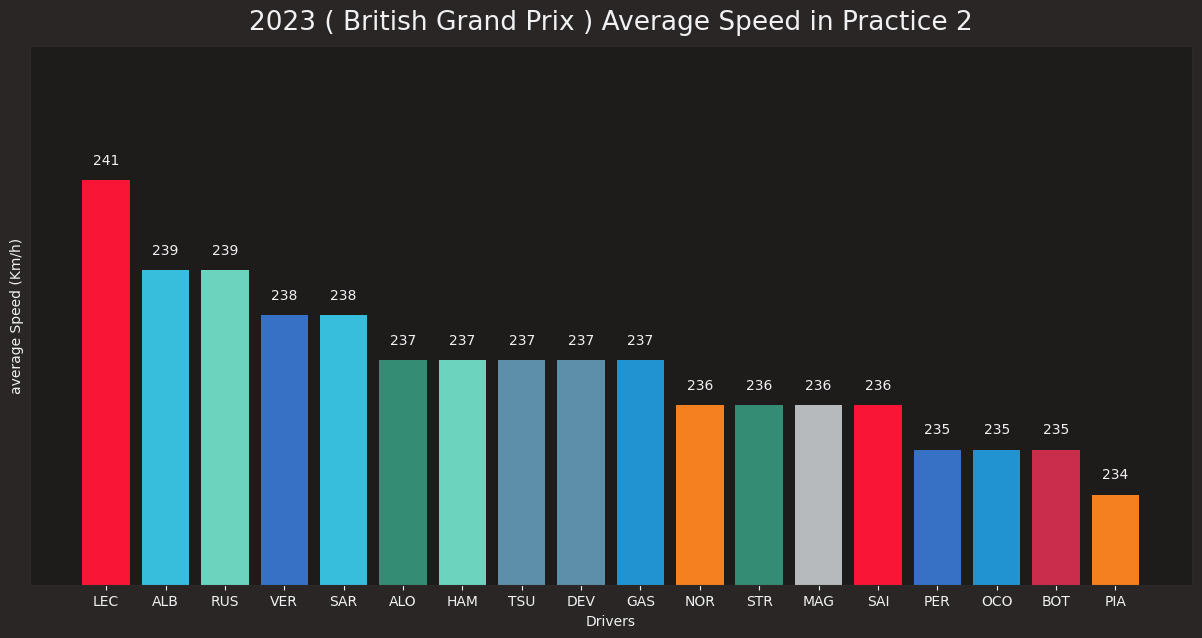

In [17]:
plt.figure(figsize=(15, 7))
x = df_top_speed["Driver"].reset_index(drop=True)
y = df_top_speed["TopSpeed"].reset_index(drop=True)

# Create the bar plot
plt.bar(x, y,color = df_top_speed["Color"])

# Add labels and title
plt.xlabel('Drivers')
plt.ylabel('average Speed (Km/h)')
plt.title('2023 ( '+session.event["EventName"]+' ) Average Speed in '+session.event["Session2"])
plt.yticks(range(300, 400, 10))
plt.ylim(y.min()-2, y.max()+3)
# Add text annotations on top of bars
for i in range(len(x)):
    plt.text(i, y.loc[i]+0.3, str(y.loc[i]), ha='center', va='bottom')

# Display the plot
plt.show()